In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [2]:
#Importing Dataset
df = pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
df.head()
df.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [4]:
#Data Exploration
#Descriptive Statistics
df.describe()
df.info()
#Missing Values
df.isnull().sum()
#Duplicated Values
df.duplicated().sum()
#columns
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


Index(['Month', 'Passengers'], dtype='object')

In [5]:
#Feature Engineering
#Renaming the Month column into Date
df.rename({'Month':'Date'},axis=1, inplace=True)

In [6]:
#Making the Date as DateTime index for the Dataframe
df1 = df.copy()
df1.set_index('Date',inplace=True)
df1.index.year

Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
       1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
       1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
       1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
       1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
       2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001,
       2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
      dtype='int32', name='Date')

In [7]:
#Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data
df["Date"] = pd.to_datetime(df.Date,format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction
df.head(10)

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
5,1995-06-01,135,Jun,1995
6,1995-07-01,148,Jul,1995
7,1995-08-01,148,Aug,1995
8,1995-09-01,136,Sep,1995
9,1995-10-01,119,Oct,1995


In [8]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot

<Axes: xlabel='month', ylabel='year'>

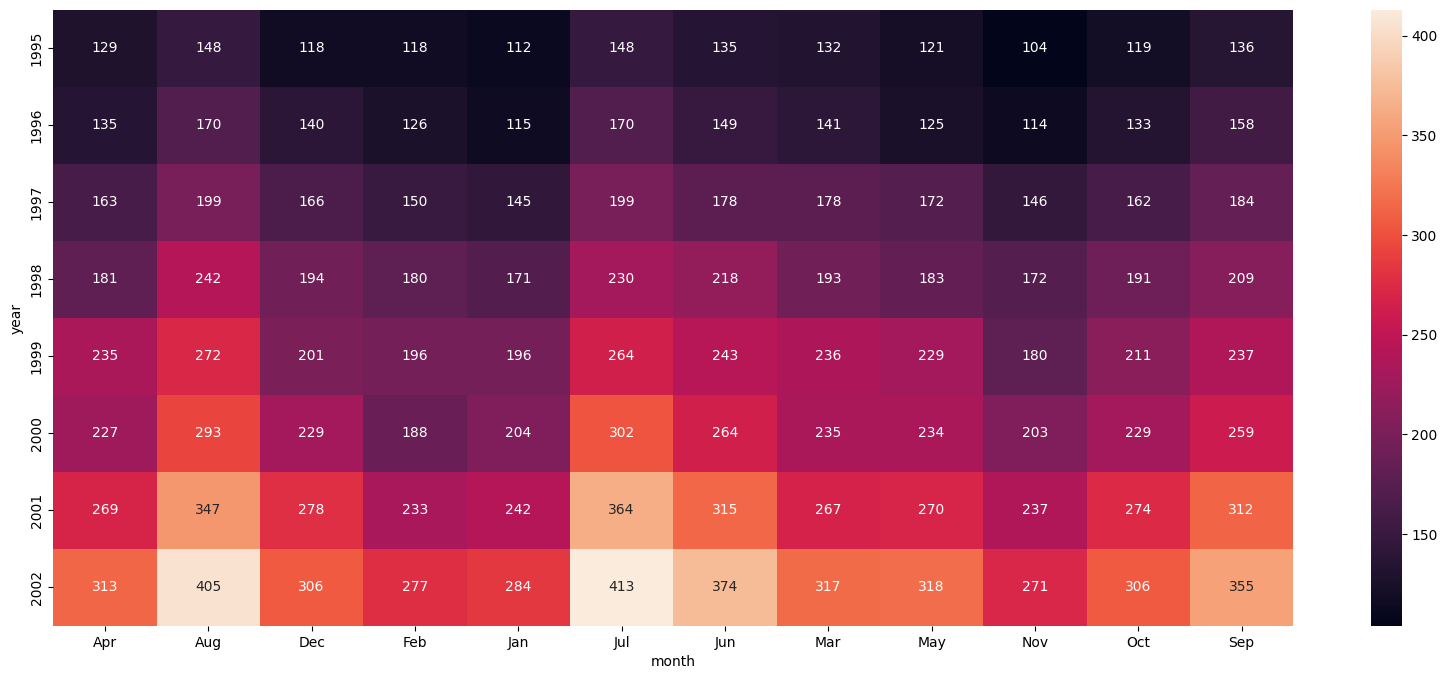

In [9]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

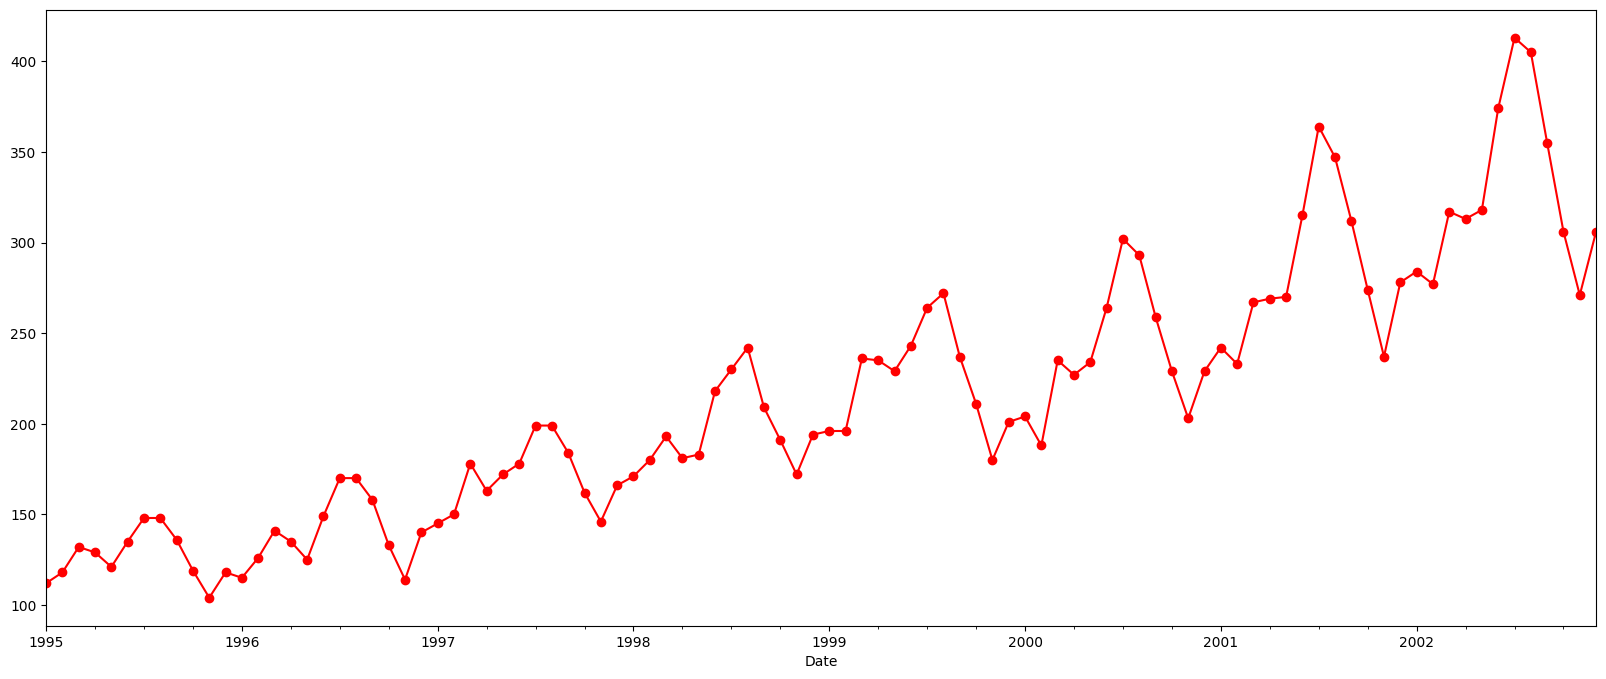

In [10]:
df1['Passengers'].plot(figsize=(20, 8),color='red',marker='o')
plt.show()

<Axes: xlabel='year', ylabel='Passengers'>

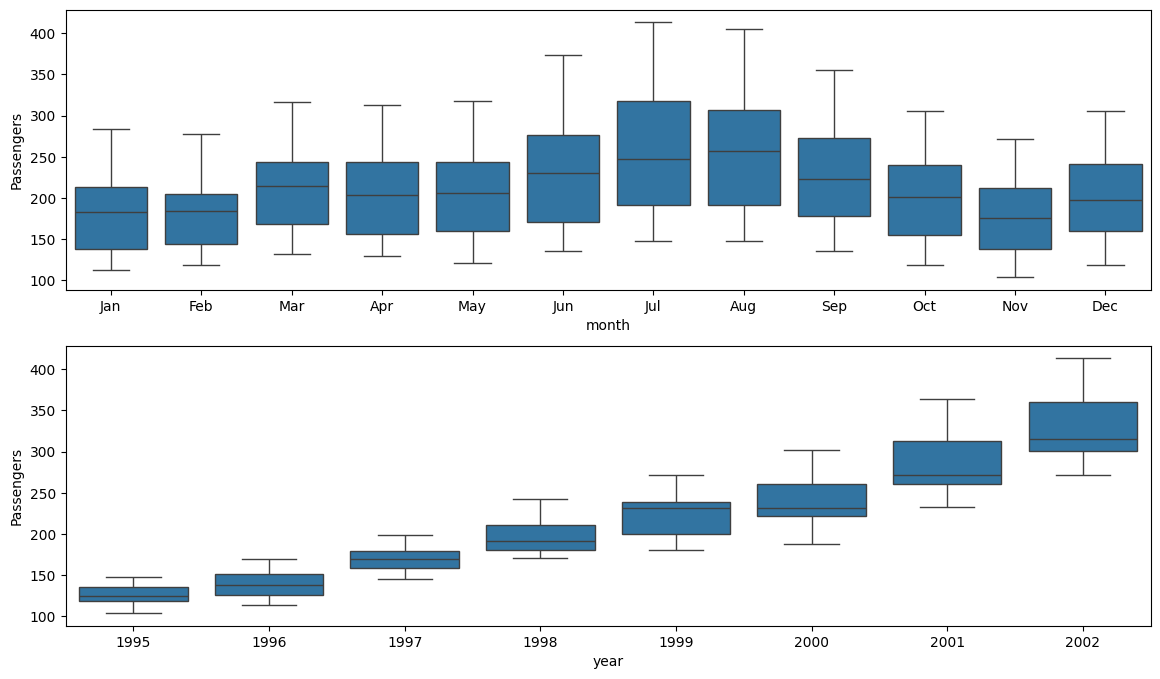

In [11]:
# Boxplot for ever
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)


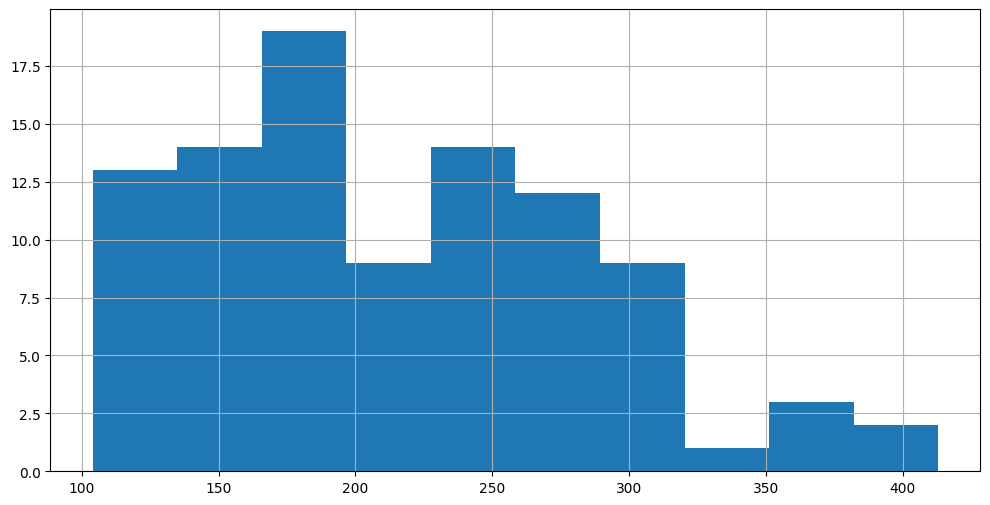

In [12]:
#Histogram and Density Plots
df.Passengers.hist(figsize=(12,6))
plt.show()

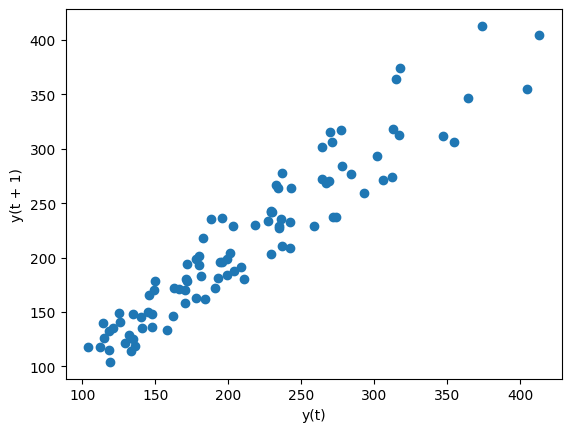

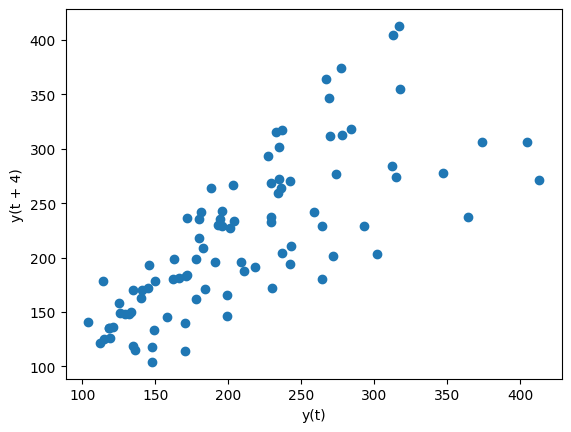

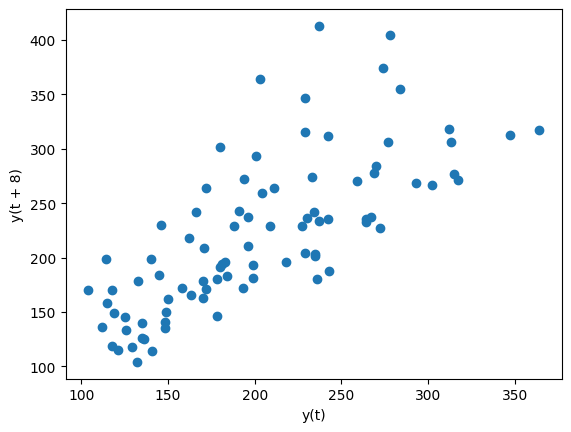

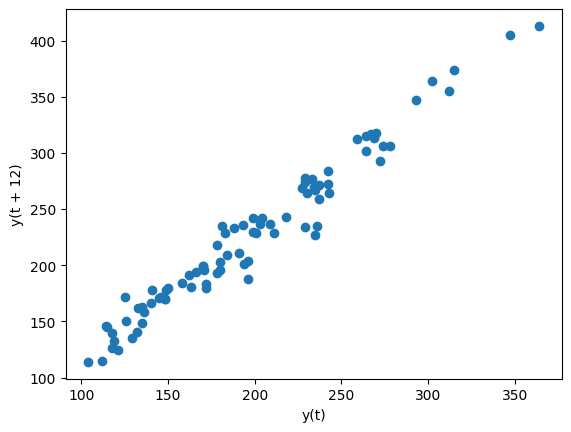

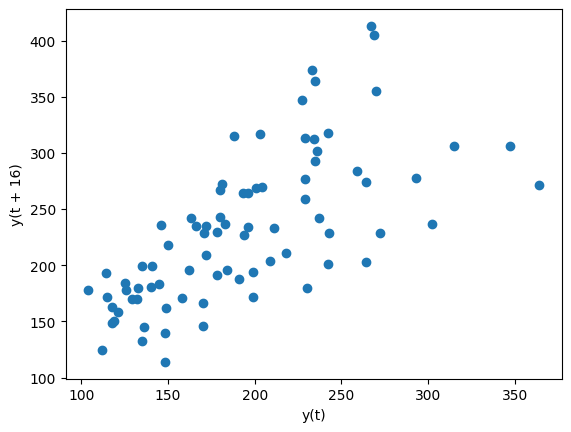

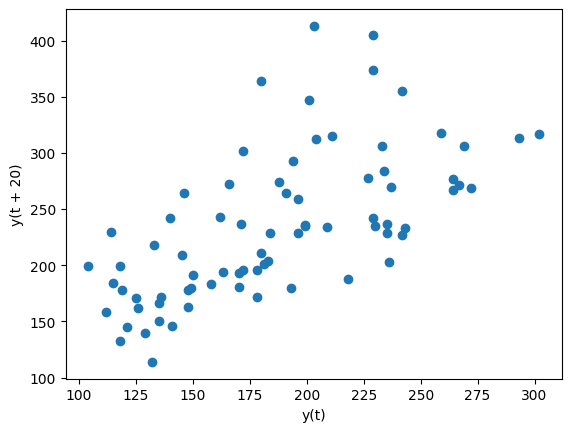

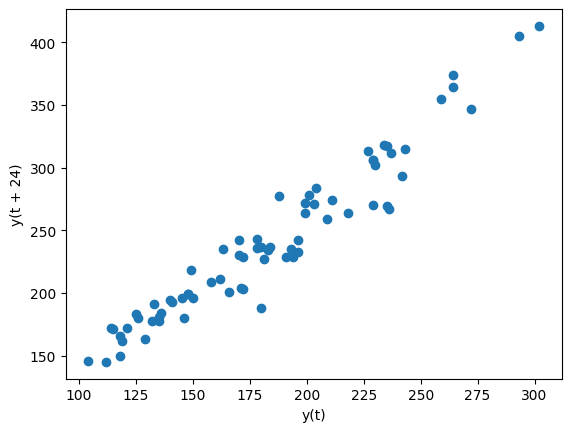

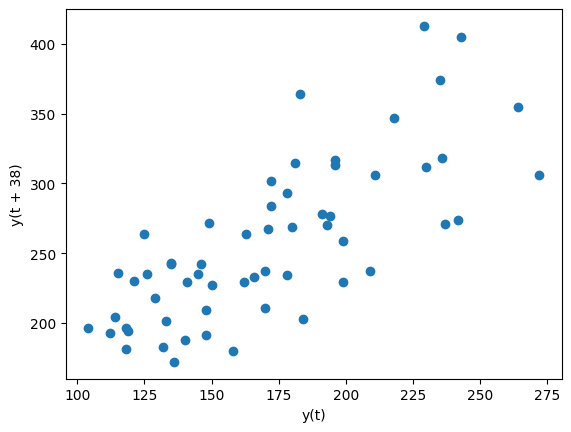

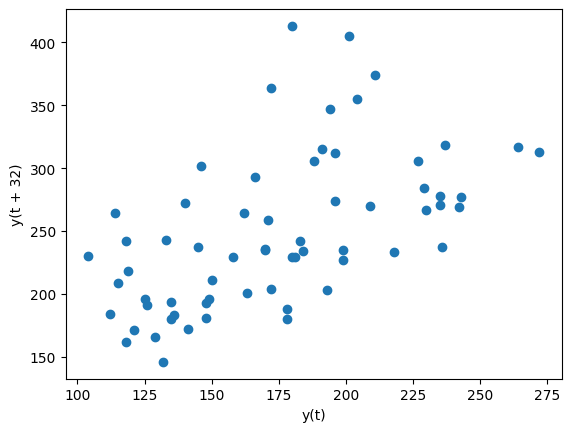

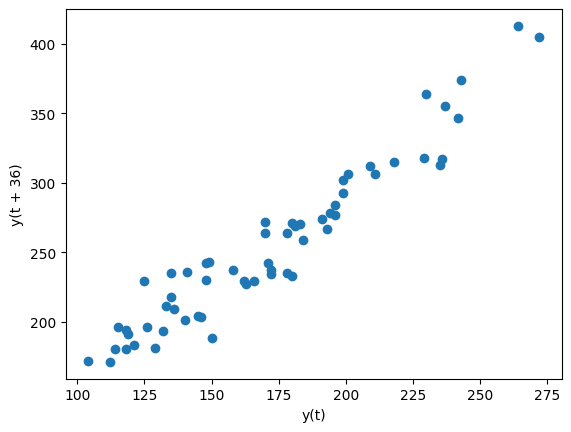

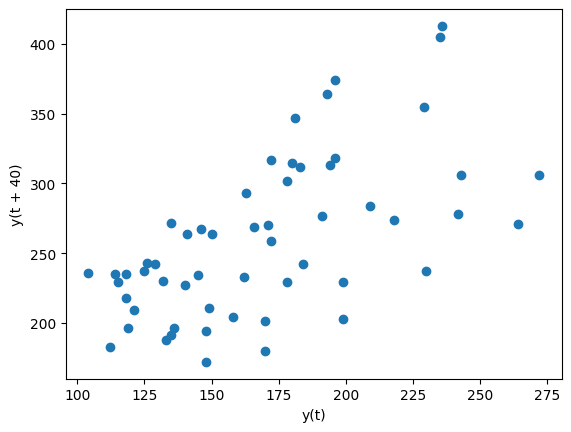

In [13]:
# create a scatter plot
for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    #plt.figure(figsize=(12,8))
    lag_plot(df.Passengers, lag=i)
    plt.show()

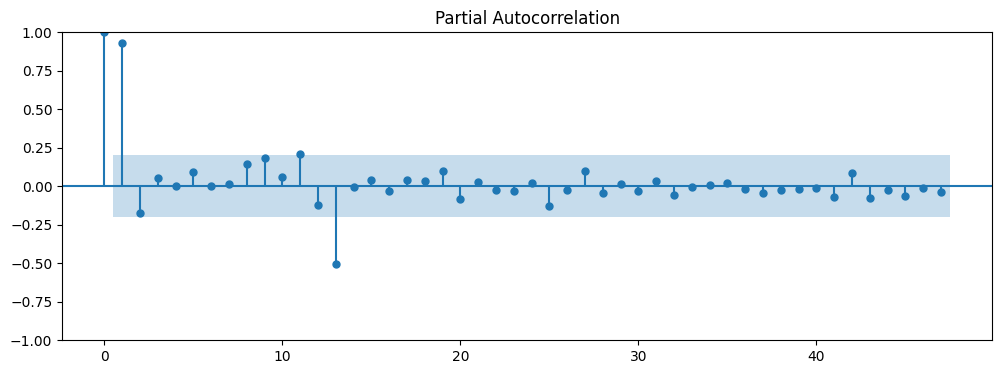

In [14]:
#ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_pacf(df.Passengers,lags=47)
    plt.show()

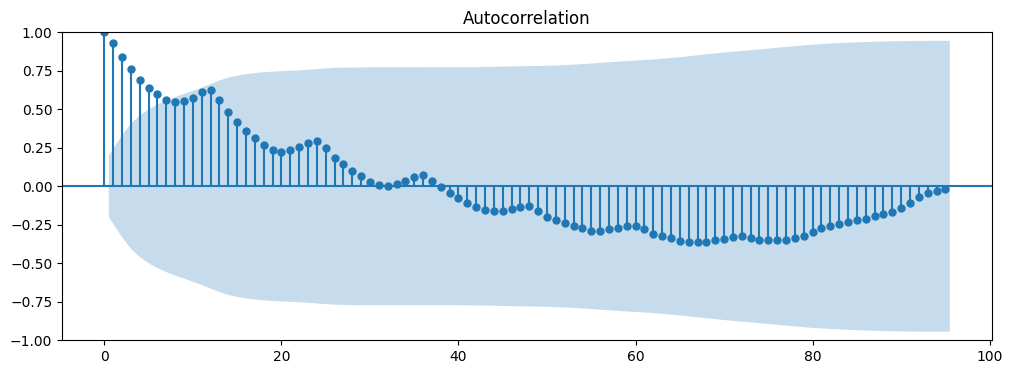

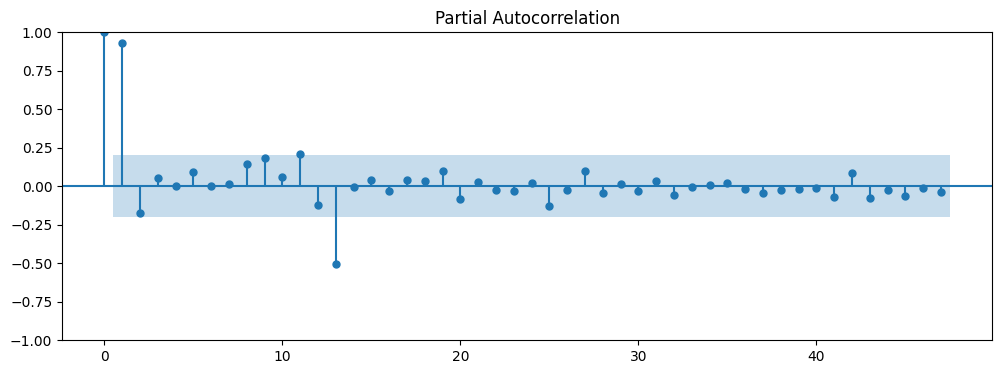

In [15]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(df.Passengers,lags=95)
    tsa_plots.plot_pacf(df.Passengers,lags=47)
    plt.show()

In [16]:
#Data Pre-processing for Model Driven Techniques
#Creating Dummy Variables of the Categorical Feature Month of Date Time feature
cocacola = df1.copy()
cocacola.reset_index(inplace=True)
cocacola['t'] = np.arange(1,len(cocacola)+1)
cocacola['t_squared'] = np.square(cocacola.t)
cocacola["month"] = cocacola.Date.dt.strftime("%b") # month extraction
cocacola["year"] = cocacola.Date.dt.strftime("%Y") # year extraction
months = pd.get_dummies(cocacola['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
cocacola = pd.concat([cocacola,months],axis=1)
cocacola['log_passengers'] = np.log(cocacola['Passengers'])
cocacola

,Date,Passengers,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-01,112,1,1,Jan,1995,True,False,False,False,False,False,False,False,False,False,False,False,4.718499
1,1995-02-01,118,2,4,Feb,1995,False,True,False,False,False,False,False,False,False,False,False,False,4.770685
2,1995-03-01,132,3,9,Mar,1995,False,False,True,False,False,False,False,False,False,False,False,False,4.882802
3,1995-04-01,129,4,16,Apr,1995,False,False,False,True,False,False,False,False,False,False,False,False,4.859812
4,1995-05-01,121,5,25,May,1995,False,False,False,False,True,False,False,False,False,False,False,False,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,Aug,2002,False,False,False,False,False,False,False,True,False,False,False,False,6.003887
92,2002-09-01,355,93,8649,Sep,2002,False,False,False,False,False,False,False,False,True,False,False,False,5.872118
93,2002-10-01,306,94,8836,Oct,2002,False,False,False,False,False,False,False,False,False,True,False,False,5.723585
94,2002-11-01,271,95,9025,Nov,2002,False,False,False,False,False,False,False,False,False,False,True,False,5.602119


In [17]:
#Splitting data into Train and Test
size = 72
train_data = cocacola.iloc[:size]
test_data = cocacola.iloc[size:]

In [18]:
#Model Building
import statsmodels.formula.api as smf


In [19]:
# linear model
linear_model = smf.ols('Passengers ~ t',data=train_data).fit()
pred_linear = pd.Series(linear_model.predict(test_data['t']))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_linear))**2))
rmse_linear

linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     217.9
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           3.50e-23
Time:                        05:29:30   Log-Likelihood:                -329.04
No. Observations:                  72   AIC:                             662.1
Df Residuals:                      70   BIC:                             666.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    110.5243      5.643     19.586      0.000      99.270     121.779
t              1.9830      0.134     14.760      0.000       1.715       2.251
==============================================================================
Omnibus:                        0.634   Durbin-Watson:                   0.659
Prob(Omnibus):                  0.728   Jarque-Bera (JB):                0.667
Skew:                           0.213   Prob(JB):                        0.717
Kurtosis:                       2.799   Cond. No.                         84.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#Exponential
Exp = smf.ols('log_passengers~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     246.3
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.28e-24
Time:                        05:34:53   Log-Likelihood:                 48.708
No. Observations:                  72   AIC:                            -93.42
Df Residuals:                      70   BIC:                            -88.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7699      0.030    160.519      0.000       4.711       4.829
t              0.0111      0.001     15.693      0.000       0.010       0.013
==============================================================================
Omnibus:                        2.000   Durbin-Watson:                   0.687
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                1.573
Skew:                          -0.186   Prob(JB):                        0.456
Kurtosis:                       2.378   Cond. No.                         84.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#Quadratic

Quad = smf.ols('Passengers~t+t_squared',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     107.4
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           6.52e-22
Time:                        05:30:44   Log-Likelihood:                -329.04
No. Observations:                  72   AIC:                             664.1
Df Residuals:                      69   BIC:                             670.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    110.2764      8.677     12.710      0.000      92.967     127.586
t              2.0031      0.549      3.652      0.001       0.909       3.097
t_squared     -0.0003      0.007     -0.038      0.970      -0.015       0.014
==============================================================================
Omnibus:                        0.649   Durbin-Watson:                   0.659
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.679
Skew:                           0.216   Prob(JB):                        0.712
Kurtosis:                       2.799   Cond. No.                     7.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#Additive seasonality

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1.379
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.206
Time:                        05:31:01   Log-Likelihood:                -371.83
No. Observations:                  72   AIC:                             767.7
Df Residuals:                      60   BIC:                             795.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     168.8333      5.044     33.475      0.000     158.745     178.922
Jan[T.True]   -11.6667     18.126     -0.644      0.522     -47.925      24.591
Feb[T.True]    -9.1667     18.126     -0.506      0.615     -45.425      27.091
Mar[T.True]    17.0000     18.126      0.938      0.352     -19.258      53.258
Apr[T.True]     9.5000     18.126      0.524      0.602     -26.758      45.758
May[T.True]     8.5000     18.126      0.469      0.641     -27.758      44.758
Jun[T.True]    29.0000     18.126      1.600      0.115      -7.258      65.258
Jul[T.True]    50.0000     18.126      2.758      0.008      13.742      86.258
Aug[T.True]    51.8333     18.126      2.860      0.006      15.575      88.091
Sep[T.True]    28.3333     18.126      1.563      0.123      -7.925      64.591
Oct[T.True]     5.3333     18.126      0.294      0.770     -30.925      41.591
Nov[T.True]   -15.6667     18.126     -0.864      0.391     -51.925      20.591
Dec[T.True]     5.8333     18.126      0.322      0.749     -30.425      42.091
==============================================================================
Omnibus:                       29.671   Durbin-Watson:                   0.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.962
Skew:                           0.033   Prob(JB):                       0.0837
Kurtosis:                       1.716   Cond. No.                     1.94e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.08e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
#Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

add_sea_Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           7.45e-35
Time:                        05:31:16   Log-Likelihood:                -266.00
No. Observations:                  72   AIC:                             560.0
Df Residuals:                      58   BIC:                             591.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     101.8335      3.657     27.847      0.000      94.513     109.154
Jan[T.True]    -6.2122      4.246     -1.463      0.149     -14.712       2.287
Feb[T.True]    -5.7134      4.246     -1.346      0.184     -14.212       2.785
Mar[T.True]    18.4504      4.246      4.345      0.000       9.951      26.949
Apr[T.True]     8.9458      4.247      2.106      0.039       0.445      17.447
May[T.True]     5.9395      4.248      1.398      0.167      -2.564      14.444
Jun[T.True]    24.4315      4.250      5.748      0.000      15.923      32.940
Jul[T.True]    43.4218      4.253     10.210      0.000      34.909      51.935
Aug[T.True]    43.2437      4.256     10.161      0.000      34.724      51.763
Sep[T.True]    17.7306      4.260      4.162      0.000       9.204      26.257
Oct[T.True]    -7.2843      4.264     -1.708      0.093     -15.819       1.251
Nov[T.True]   -30.3009      4.269     -7.098      0.000     -38.846     -21.756
Dec[T.True]   -10.8192      4.274     -2.531      0.014     -19.375      -2.263
t               1.9472      0.250      7.802      0.000       1.448       2.447
t_squared       0.0009      0.003      0.259      0.797      -0.006       0.007
==============================================================================
Omnibus:                        1.717   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.039
Skew:                          -0.185   Prob(JB):                        0.595
Kurtosis:                       3.458   Cond. No.                     8.53e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.51e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [23]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

Mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.268
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.265
Time:                        05:31:29   Log-Likelihood:                 1.9383
No. Observations:                  72   AIC:                             20.12
Df Residuals:                      60   BIC:                             47.44
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.7771      0.028    170.187      0.000       4.721       4.833
Jan[T.True]     0.2526      0.101      2.504      0.015       0.051       0.454
Feb[T.True]     0.2771      0.101      2.747      0.008       0.075       0.479
Mar[T.True]     0.4229      0.101      4.192      0.000       0.221       0.625
Apr[T.True]     0.3799      0.101      3.766      0.000       0.178       0.582
May[T.True]     0.3680      0.101      3.648      0.001       0.166       0.570
Jun[T.True]     0.4804      0.101      4.762      0.000       0.279       0.682
Jul[T.True]     0.5814      0.101      5.763      0.000       0.380       0.783
Aug[T.True]     0.5898      0.101      5.847      0.000       0.388       0.792
Sep[T.True]     0.4825      0.101      4.783      0.000       0.281       0.684
Oct[T.True]     0.3554      0.101      3.523      0.001       0.154       0.557
Nov[T.True]     0.2259      0.101      2.239      0.029       0.024       0.428
Dec[T.True]     0.3611      0.101      3.580      0.001       0.159       0.563
==============================================================================
Omnibus:                       56.848   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.403
Skew:                          -0.180   Prob(JB):                       0.0407
Kurtosis:                       1.584   Cond. No.                     1.94e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.08e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test_data))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

Mul_Add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     149.0
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.95e-39
Time:                        05:32:45   Log-Likelihood:                 118.39
No. Observations:                  72   AIC:                            -210.8
Df Residuals:                      59   BIC:                            -181.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.3975      0.011    383.337      0.000       4.375       4.420
Jan[T.True]     0.2829      0.020     14.007      0.000       0.243       0.323
Feb[T.True]     0.2962      0.020     14.669      0.000       0.256       0.337
Mar[T.True]     0.4306      0.020     21.334      0.000       0.390       0.471
Apr[T.True]     0.3765      0.020     18.650      0.000       0.336       0.417
May[T.True]     0.3532      0.020     17.497      0.000       0.313       0.394
Jun[T.True]     0.4544      0.020     22.497      0.000       0.414       0.495
Jul[T.True]     0.5441      0.020     26.926      0.000       0.504       0.585
Aug[T.True]     0.5413      0.020     26.763      0.000       0.501       0.582
Sep[T.True]     0.4227      0.020     20.879      0.000       0.382       0.463
Oct[T.True]     0.2844      0.020     14.028      0.000       0.244       0.325
Nov[T.True]     0.1436      0.020      7.073      0.000       0.103       0.184
Dec[T.True]     0.2676      0.020     13.157      0.000       0.227       0.308
t               0.0113      0.000     37.943      0.000       0.011       0.012
==============================================================================
Omnibus:                        4.430   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                3.600
Skew:                          -0.438   Prob(JB):                        0.165
Kurtosis:                       3.658   Cond. No.                     8.36e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.82e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
#Compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
type(data)

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.714670
4,rmse_add_sea_quad,35.241608
1,rmse_Exp,42.552329
0,rmse_linear,51.667793
2,rmse_Quad,51.990736
3,rmse_add_sea,127.264516
5,rmse_Mult_sea,132.187628
